# EDA

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

#Bước 1: Tải dữ liệu
train = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")
test = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/test.csv")

#Bước 2: Khai thác dữ liệu
#xem một số dòng
print(train.head())

#xem thống kê dữ liệu
print(train.describe());

C:\Users\thaov\AppData\Local\Temp\ipykernel_2032\3545192760.py:12: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [102]:
#loại bỏ các cột không cần thiết
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_train = train.drop(d_col , axis=1).copy()
drop_train

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [86]:
#Explore the NAN value in the dataset
drop_train.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [87]:
#Drop it
drop_na = drop_train.dropna().copy()
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
5,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3,4,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3,-1,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816215,Low_spent_Small_value_payments,444.8670318506144,Good


In [88]:
drop_na.duplicated().any()

False

In [89]:
for i in drop_na:
  print('\n',i,drop_na[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 49 61 29 50 58 45  6 55 56 59 57 54
 62 67 36 41 21 24 65 33 32 39 47 46 60 64 35 44 38 -3 63 42 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250'

In [90]:
#Drop the incorrect data
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [91]:
#Sửa lại toàn bộ bảng dữ liệu sai
sym = "\\`*_{}[]()>#@+!$:;"  #ký tự không hợp lệ
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income'] #các cột dạng số
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score'] #các cột dạng chuỗi
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'') #thay thế bằng chuỗi rỗng
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head()

C:\Users\thaov\AppData\Local\Temp\ipykernel_19304\1063419540.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].astype(str).str.replace(c,'') #thay thế bằng chuỗi rỗng


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good


In [92]:
#Chuyển chuỗi thành giá trị số
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good


In [93]:
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,1,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,6,484.5912142650067,Good


In [94]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [95]:
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '1', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '0', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No', '2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,2
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,2
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,2
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,2
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,1
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,0
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,0
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,0


In [96]:
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [97]:
#lọc giá trị cột Age lớn hơn 0
drop_na['Age'] = drop_na['Age'].astype(int)
drop_na = drop_na[drop_na['Age'] >= 0]

<AxesSubplot:ylabel='Credit_Score'>

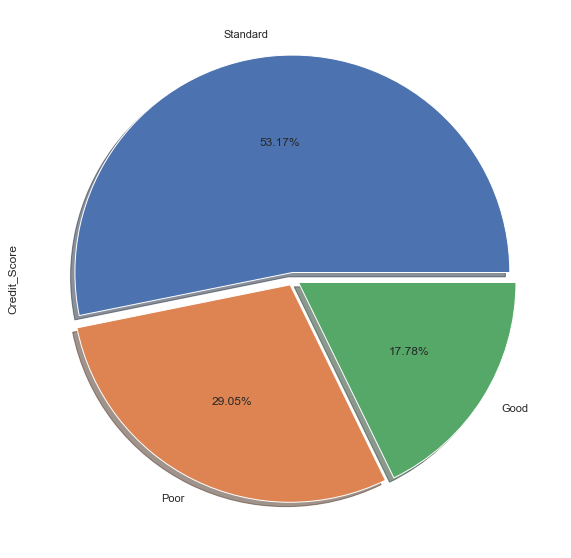

In [98]:
drop_na["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])

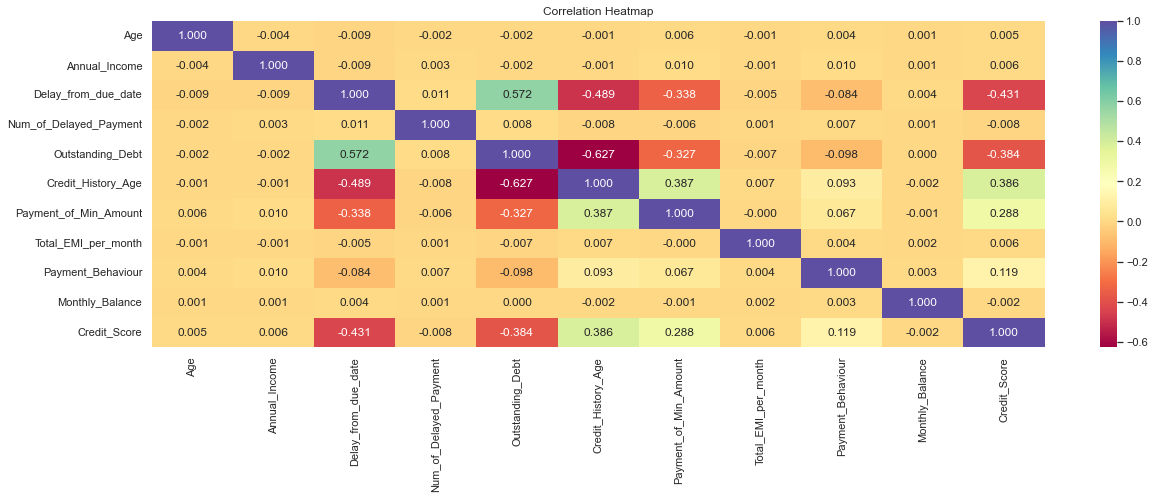

In [99]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")

show_heat_map(drop_na)

In [100]:
#hiển thị biểu đồ stripplot để phân tích các giá trị ngoại lai
def show_outliers(data, col, edge):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    sns.stripplot(y=col, data=data[data[col] < edge], ax=axs[0])
    axs[0].set_title(f"{col} < {edge}")
    sns.stripplot(y=col, data=data[data[col] > edge], ax=axs[1])
    axs[1].set_title(f"{col} > {edge}")
    plt.tight_layout()
    plt.show()

In [101]:
#gọi hàm cho từng cột cụ thể
def outlier(data):
    show_outliers(data,"Age", 56)
    show_outliers(data,"Num_of_Delayed_Payment", 30)
    show_outliers(data,"Monthly_Balance",1e-10)

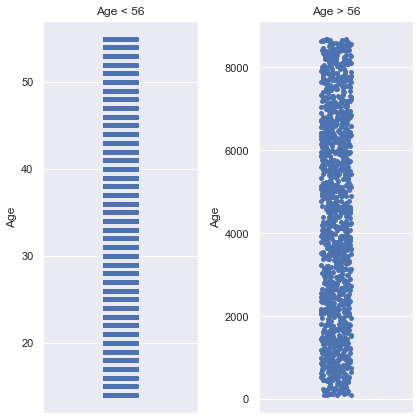

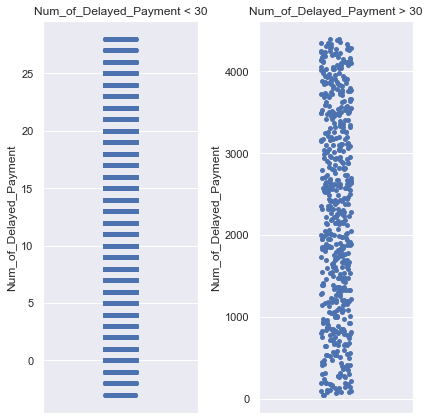

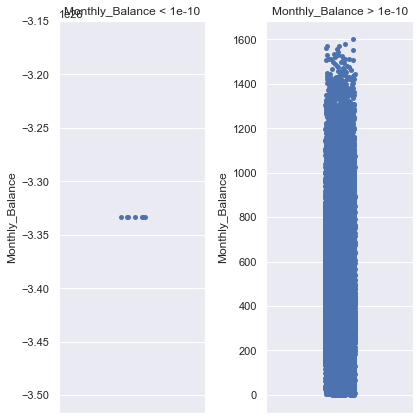

In [102]:
outlier(drop_na)

In [103]:
import numpy as np
train_new = drop_na.copy()

cols = [
    "Age",
    "Num_of_Delayed_Payment",
    "Monthly_Balance",
]

for col in cols:
    q1, q3 = np.percentile(train_new[col], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers_mask = (train_new[col] < lower_bound) | (train_new[col] > upper_bound)
    train_new = train_new[~outliers_mask]

train_new.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,63956.00000,6.395600e+04,63956.000000,63956.000000,63956.000000,63956.000000,63956.000000,63956.000000,63956.000000,63956.000000,63956.000000
mean,33.11683,1.730920e+05,21.764197,13.654778,1479.069134,17.931238,1.210270,1391.237929,3.112718,356.500803,0.863703
std,10.72644,1.456148e+06,15.088264,6.225923,1175.010270,8.308732,0.636599,8253.554571,1.799540,141.953446,0.671393
min,14.00000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,0.007760,0.000000
25%,24.00000,1.866656e+04,10.000000,9.000000,592.240000,11.400000,1.000000,30.635718,1.000000,265.086601,0.000000
50%,33.00000,3.460135e+04,19.000000,14.000000,1216.310000,17.800000,1.000000,66.915017,3.000000,324.545199,1.000000
75%,41.00000,6.303088e+04,29.000000,18.000000,2072.250000,24.500000,2.000000,151.489409,5.000000,427.792658,1.000000
max,56.00000,2.419806e+07,67.000000,28.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,772.137307,2.000000


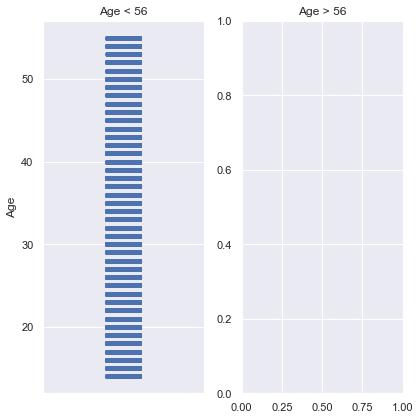

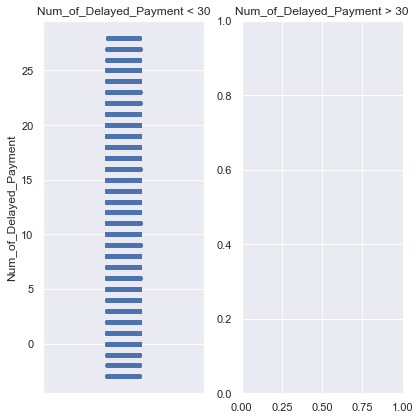

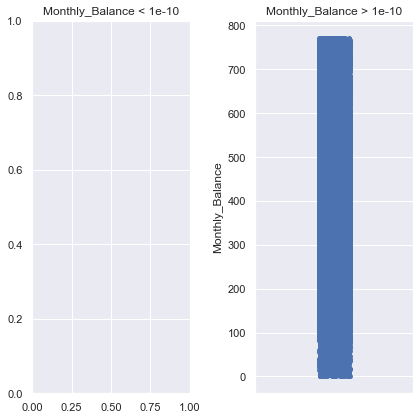

In [104]:
outlier(train_new)

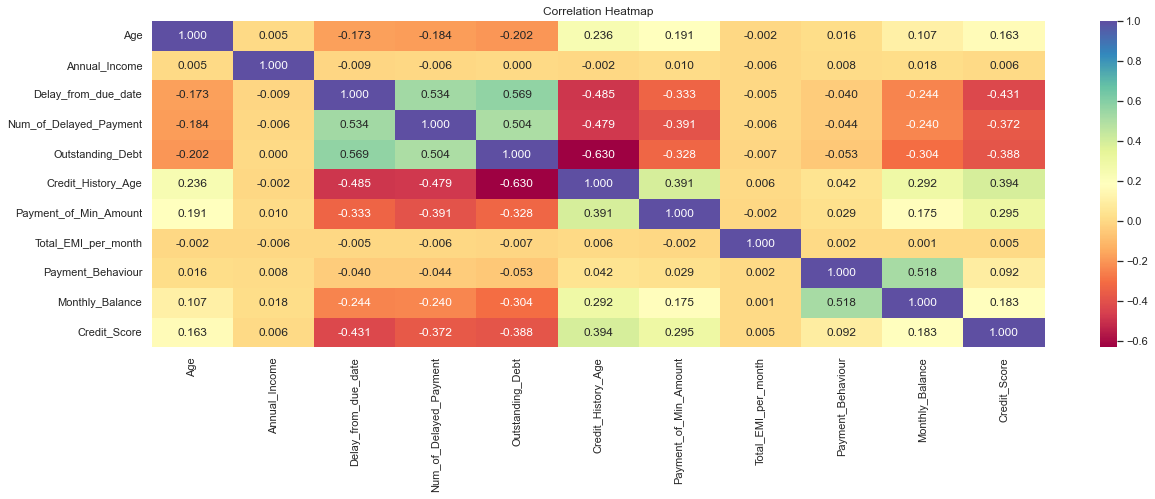

In [105]:
show_heat_map(train_new)

In [106]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y_train = train_new["Credit_Score"]
x_train = train_new.drop("Credit_Score", axis=1)
x_train, y_train = sampler.fit_resample(x_train, y_train)

train_new = pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1)

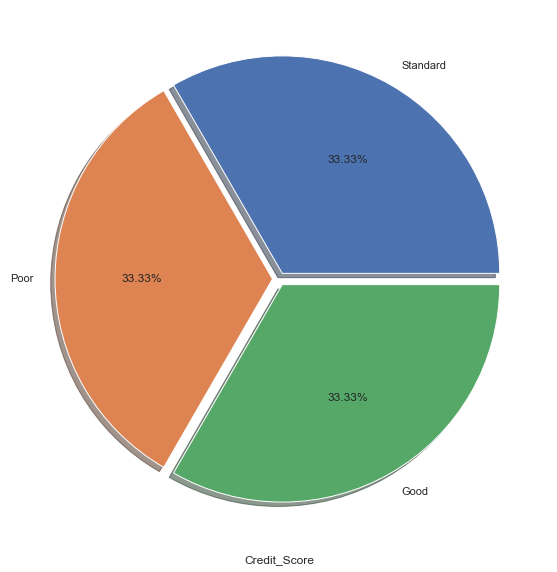

In [107]:
train_new["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],
)
plt.xlabel("Credit_Score")  # Thêm dòng lệnh chỉnh khoảng cách của y_label
plt.ylabel("")
plt.show()

In [108]:
#Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in train_cleaned[col_float]:
  train_new[i] = scaler.fit_transform(train_new[[i]])
train_new.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.214286,Scientist,0.000501,0.111111,0.322581,0.162020,0.652819,2,0.000602,4.0,0.404707,2
1,0.214286,Scientist,0.000501,0.138889,0.225806,0.162020,0.661721,2,0.000602,1.0,0.289386,2
2,0.214286,Scientist,0.000501,0.111111,0.354839,0.162020,0.670623,2,0.000602,1.0,0.316731,2
3,0.333333,Teacher,0.001151,0.166667,0.129032,0.121012,0.792285,2,0.000229,6.0,0.627593,2
4,0.333333,Teacher,0.001151,0.111111,0.064516,0.121012,0.795252,2,0.000229,6.0,0.604120,1


In [109]:
#sử dụng phương pháp One-Hot Encoding để biến đổi biến phân loại "Occupation" thành các biến giả định
train_new = pd.get_dummies(train_new, prefix='Occupation', columns=['Occupation'], drop_first=False)
train_new.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.214286,0.000501,0.111111,0.322581,0.162020,0.652819,2,0.000602,4.0,0.404707,...,0,0,0,0,0,0,0,1,0,0
1,0.214286,0.000501,0.138889,0.225806,0.162020,0.661721,2,0.000602,1.0,0.289386,...,0,0,0,0,0,0,0,1,0,0
2,0.214286,0.000501,0.111111,0.354839,0.162020,0.670623,2,0.000602,1.0,0.316731,...,0,0,0,0,0,0,0,1,0,0
3,0.333333,0.001151,0.166667,0.129032,0.121012,0.792285,2,0.000229,6.0,0.627593,...,0,0,0,0,0,0,0,0,1,0
4,0.333333,0.001151,0.111111,0.064516,0.121012,0.795252,2,0.000229,6.0,0.604120,...,0,0,0,0,0,0,0,0,1,0


In [110]:
#Gán tất cả các cột vào biến feed
feed = train_new[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]

In [111]:
df_train_x = feed.drop('Credit_Score',axis = 1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=42)

In [112]:
# Lưu tập huấn luyện và tập kiểm tra vào các file
train_file_path = 'C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_train.csv'
test_file_path = 'C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_test.csv'

# Lưu tập huấn luyện
train_data = pd.concat([x_train, y_train], axis=1)
train_data.to_csv(train_file_path, index=False)

# Lưu tập kiểm tra
test_data = pd.concat([x_test, y_test], axis=1)
test_data.to_csv(test_file_path, index=False)

(train_file_path, test_file_path)

('C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_train.csv',
 'C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_test.csv')

# Modeling

In [29]:
# Đọc dữ liệu train
train_data = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_train.csv")

# Đọc dữ liệu test
test_data = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_test.csv")

# Train data
x_train = train_data.drop("Credit_Score", axis=1)
y_train = train_data["Credit_Score"]

# Test data
x_test = test_data.drop("Credit_Score", axis=1)
y_test = test_data["Credit_Score"]

In [12]:
print(f'x_train {x_train.shape}')
print(f'y_train {y_train.shape}')
print(f'x_test  {x_test.shape}')
print(f'y_test  {x_test.shape}')

x_train (81453, 25)
y_train (81453,)
x_test  (20364, 25)
y_test  (20364, 25)


## Decision Tree

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1234)# Tạo mô hình Decision Tree
dtree = dtree.fit(x_train, y_train) # huấn luyện mô hình Decision Tree

y_pred = dtree.predict(x_test) #Dự đoán trên tập dữ liệu test
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred , average='weighted')
f1 = f1_score(y_test, y_pred ,average='weighted')
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)

print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8553820467491652
Precision: 0.854924220542023
Recall: 0.8553820467491652
F1 Score: 0.8516880293105592
Confusion Matrix:
[[6099  648   74]
 [1192 4784  825]
 [  25  181 6536]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6821
           1       0.85      0.70      0.77      6801
           2       0.88      0.97      0.92      6742

    accuracy                           0.86     20364
   macro avg       0.86      0.86      0.85     20364
weighted avg       0.85      0.86      0.85     20364



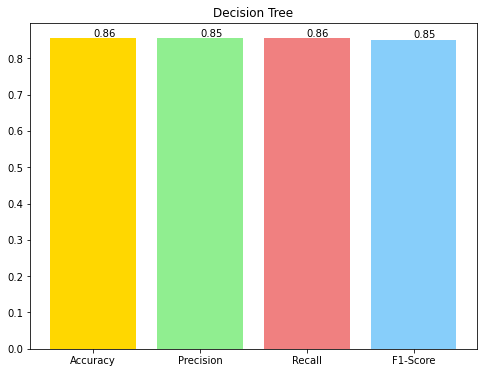

In [91]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('Decision Tree')
plt.show()

In [33]:
models = {
    'Decision Tree': {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    },
}

## K-Nearest Neighbor

In [34]:
#Mô hình K - láng giềng gần nhất
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()  #tạo mô hình
kn.fit(x_train, y_train)    #huấn luyện mô hình

kn_y_pred = kn.predict(x_test)  #dự đoán nhãn của x_test

kn_accuracy = accuracy_score(y_test, kn_y_pred)
kn_precision = precision_score(y_test, kn_y_pred,average='weighted')
kn_recall = recall_score(y_test, kn_y_pred , average='weighted')
kn_f1 = f1_score(y_test, kn_y_pred ,average='weighted')
kn_cm = confusion_matrix(y_test, kn_y_pred)

print("Accuracy:", kn_accuracy)
print("Precision:", kn_precision)
print("Recall:", kn_recall)
print("F1 Score:", kn_f1)
print("Confusion Matrix:")
print(kn_cm)

print()
print("Classification Report:")
print(classification_report(y_test, kn_y_pred))   #báo cáo phân loại

Accuracy: 0.7120899626792379
Precision: 0.707868104445855
Recall: 0.7120899626792379
F1 Score: 0.7021209739585486
Confusion Matrix:
[[5431  924  466]
 [1857 3296 1648]
 [ 339  629 5774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6821
           1       0.68      0.48      0.57      6801
           2       0.73      0.86      0.79      6742

    accuracy                           0.71     20364
   macro avg       0.71      0.71      0.70     20364
weighted avg       0.71      0.71      0.70     20364



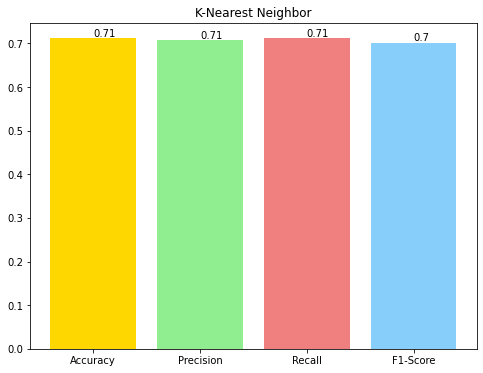

In [92]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [kn_accuracy, kn_precision, kn_recall, kn_f1]

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('K-Nearest Neighbor')
plt.show()

In [35]:
models['K-Nearest Neighbor'] = [kn_accuracy, kn_precision, kn_recall, kn_f1]

## Random Forest

In [36]:
#Mô hình RandomForestClassifier: một tập hợp các cây quyết định (decision trees), giảm thiểu overfitting
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=7152)

rf.fit(x_train, y_train)

rf_y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred,average='weighted')
rf_recall = recall_score(y_test, rf_y_pred , average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred ,average='weighted')
rf_cm = confusion_matrix(y_test, rf_y_pred)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_cm)

print()
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

Accuracy: 0.8857788253781183
Precision: 0.8877731705197484
Recall: 0.8857788253781183
F1 Score: 0.8826779969065467
Confusion Matrix:
[[6369  385   67]
 [1007 5044  750]
 [   5  112 6625]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6821
           1       0.91      0.74      0.82      6801
           2       0.89      0.98      0.93      6742

    accuracy                           0.89     20364
   macro avg       0.89      0.89      0.88     20364
weighted avg       0.89      0.89      0.88     20364



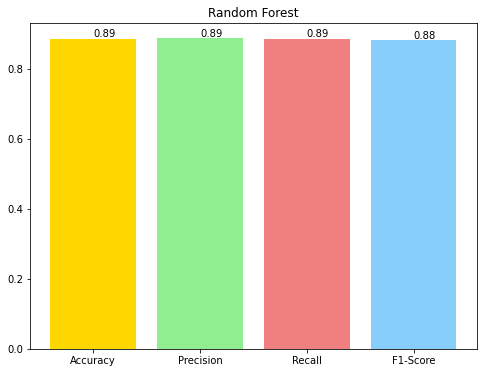

In [93]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('Random Forest')
plt.show()

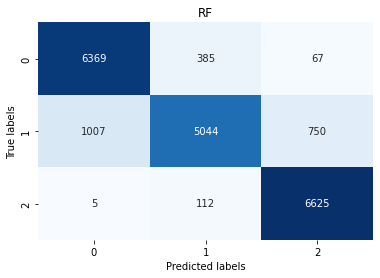

In [39]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("RF")
sns.heatmap(confusion_matrix(y_test, rf_y_pred),
            annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [40]:
models['Random Forest'] = [rf_accuracy, rf_precision, rf_recall, rf_f1]

## XGBoost

In [94]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, learning_rate=0.1, n_estimators=250, max_depth=8, min_child_weight=1, gamma=0, subsample=0.9, n_jobs=-1)

# Train the model
xgb_clf.fit(x_train, y_train)

# Predict the Credit Score on the test set
y_pred_xgb = xgb_clf.predict(x_test)

# Calculate the evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Confusion Matrix:")
print(cm_xgb)

print()
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.8359850716951484
Precision: 0.8377078195014053
Recall: 0.8359850716951484
F1 Score: 0.8308857824510772
Confusion Matrix:
[[6156  452  213]
 [1285 4478 1038]
 [  35  317 6390]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6821
           1       0.85      0.66      0.74      6801
           2       0.84      0.95      0.89      6742

    accuracy                           0.84     20364
   macro avg       0.84      0.84      0.83     20364
weighted avg       0.84      0.84      0.83     20364



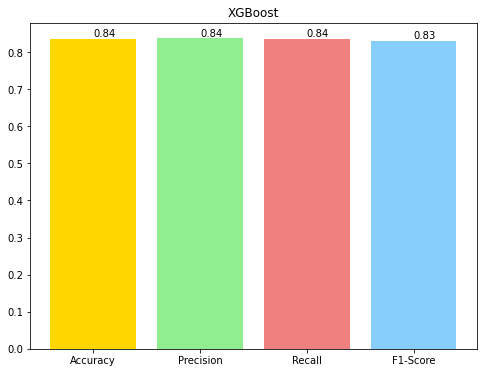

In [96]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('XGBoost')
plt.show()

In [42]:
models['XGBoost'] = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

## Naive Bayes

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score

# Định nghĩa mô hình và tham số cần tinh chỉnh
model = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Sử dụng độ chính xác làm chỉ số đánh giá
scorer = make_scorer(accuracy_score)

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Huấn luyện mô hình với tìm kiếm lưới và kiểm định chéo
grid_search.fit(x_train, y_train)

# Lấy ra tham số tốt nhất và mô hình tốt nhất
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Đánh giá mô hình tốt nhất trên tập kiểm tra
y_pred = best_model.predict(x_test)

# Tính toán các chỉ số đánh giá
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")

Best Parameters: {'var_smoothing': 0.01}
Accuracy: 0.6179532508348066
Precision: 0.6114333374154829
Recall: 0.6179532508348066
F1 Score: 0.5856266422948866


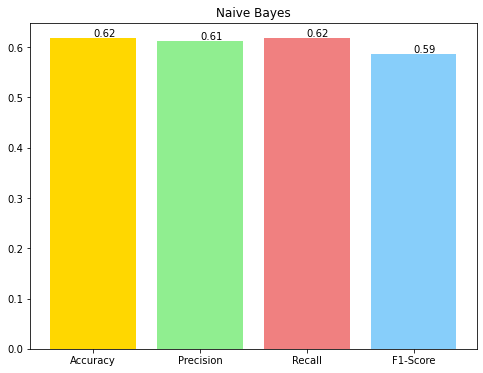

In [95]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('Naive Bayes')
plt.show()

In [43]:
models['Naive Bayes'] = [nb_accuracy, nb_precision, nb_recall, nb_f1]

# Mạng nơ-ron tích chập sâu - CNN

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load the data
train_data = pd.read_csv('C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_train.csv')
test_data = pd.read_csv('C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/xy_test.csv')

# Assuming the last column is the target and the rest are features
X_train = train_data.drop('Credit_Score', axis=1)
y_train = train_data['Credit_Score']

X_test = test_data.drop('Credit_Score', axis=1)
y_test = test_data['Credit_Score']

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

# Initialize the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Flatten the output for the dense layer
model.add(Flatten())

# Add a dense layer
model.add(Dense(50, activation='relu'))

# Output layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Reshape input for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))
from sklearn.metrics import classification_report

# Predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Evaluation
print(classification_report(y_test_classes, y_pred_classes))
cnn_accuracy = accuracy_score(y_test_classes, y_pred_classes)
cnn_precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
cnn_recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
cnn_f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {cnn_accuracy}")
print(f"Precision: {cnn_precision}")
print(f"Recall: {cnn_recall}")
print(f"F1-Score: {cnn_f1}")

Epoch 1/10


C:\Users\thaov\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


2546/2546 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6520 - loss: 0.8081 - val_accuracy: 0.6717 - val_loss: 0.7701
Epoch 2/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6760 - loss: 0.7672 - val_accuracy: 0.6798 - val_loss: 0.7595
Epoch 3/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6801 - loss: 0.7575 - val_accuracy: 0.6799 - val_loss: 0.7532
Epoch 4/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6833 - loss: 0.7505 - val_accuracy: 0.6806 - val_loss: 0.7492
Epoch 5/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6872 - loss: 0.7416 - val_accuracy: 0.6816 - val_loss: 0.7450
Epoch 6/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6853 - loss: 0.7416 - val_accuracy: 0.6857 - val_loss: 0.7417
Epoch 7/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6874 - loss: 0.7346 - val_accuracy: 0.6821 - val_loss: 0.7419
Epoch 8/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6938 - loss: 0.7259 - val

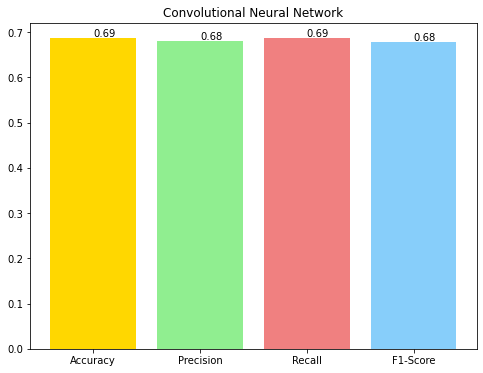

In [97]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1]

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('Convolutional Neural Network')
plt.show()

In [44]:
models['Convolutional Neural Network'] = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1]

## Mạng nơ-ron hồi quy - RNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Initialize the RNN model
rnn_model = Sequential()

# Add an LSTM layer
rnn_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))

# Adding a second LSTM layer
rnn_model.add(LSTM(units=50))
rnn_model.add(Dropout(0.2))

# Adding a dense layer
rnn_model.add(Dense(units=50, activation='relu'))
rnn_model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Output layer

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1 epoch
rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Predictions and Evaluation
y_pred_rnn = rnn_model.predict(X_test_reshaped)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Generating classification report
print("Classification Report for RNN:")
print(classification_report(y_test_classes, y_pred_classes_rnn))

# Individual scores
accuracy_rnn = accuracy_score(y_test_classes, y_pred_classes_rnn)
precision_rnn = precision_score(y_test_classes, y_pred_classes_rnn, average='weighted')
recall_rnn = recall_score(y_test_classes, y_pred_classes_rnn, average='weighted')
f1_rnn = f1_score(y_test_classes, y_pred_classes_rnn, average='weighted')

print(f"Accuracy: {accuracy_rnn}")
print(f"Precision: {precision_rnn}")
print(f"Recall: {recall_rnn}")
print(f"F1-Score: {f1_rnn}")

Epoch 1/10


C:\Users\thaov\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2546/2546 ━━━━━━━━━━━━━━━━━━━━ 66s 24ms/step - accuracy: 0.5140 - loss: 0.9696 - val_accuracy: 0.6114 - val_loss: 0.8622
Epoch 2/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.6128 - loss: 0.8622 - val_accuracy: 0.6229 - val_loss: 0.8425
Epoch 3/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.6311 - loss: 0.8344 - val_accuracy: 0.6494 - val_loss: 0.8084
Epoch 4/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 0.6530 - loss: 0.8089 - val_accuracy: 0.6649 - val_loss: 0.7821
Epoch 5/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 0.6681 - loss: 0.7839 - val_accuracy: 0.6660 - val_loss: 0.7850
Epoch 6/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 0.6732 - loss: 0.7747 - val_accuracy: 0.6713 - val_loss: 0.7662
Epoch 7/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 60s 23ms/step - accuracy: 0.6766 - loss: 0.7702 - val_accuracy: 0.6750 - val_loss: 0.7624
Epoch 8/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.6775 - loss: 0.76

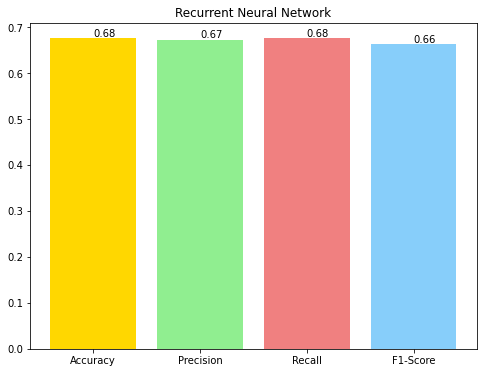

In [98]:
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy_rnn, precision_rnn, recall_rnn, f1_rnn]

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, scores, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.title('Recurrent Neural Network')
plt.show()

In [45]:
models['Recurrent Neural Network'] = [accuracy_rnn, precision_rnn, recall_rnn, f1_rnn]

In [46]:
models

{'Decision Tree': {'Accuracy': 0.8553820467491652,
  'Precision': 0.854924220542023,
  'Recall': 0.8553820467491652,
  'F1-score': 0.8516880293105592},
 'K-Nearest Neighbor': [0.7120899626792379,
  0.707868104445855,
  0.7120899626792379,
  0.7021209739585486],
 'Random Forest': [0.8857788253781183,
  0.8877731705197484,
  0.8857788253781183,
  0.8826779969065467],
 'XGBoost': [0.8359850716951484,
  0.8377078195014053,
  0.8359850716951484,
  0.8308857824510772],
 'Naive Bayes': [0.6179532508348066,
  0.6114333374154829,
  0.6179532508348066,
  0.5856266422948866],
 'Convolutional Neural Network': [0.6863582793164408,
  0.6799021045337514,
  0.6863582793164408,
  0.6778604071141685],
 'Recurrent Neural Network': [0.6757022196032214,
  0.6719618543301087,
  0.6757022196032214,
  0.663117497687318]}

In [47]:
model_data = []
for model, metrics in models.items():
    if isinstance(metrics, dict):
        metrics_list = [metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1-score']]
    else:
        metrics_list = metrics
    model_data.append([model] + metrics_list)

df = pd.DataFrame(model_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
df

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.855382,0.854924,0.855382,0.851688
1,K-Nearest Neighbor,0.712090,0.707868,0.712090,0.702121
2,Random Forest,0.885779,0.887773,0.885779,0.882678
3,XGBoost,0.835985,0.837708,0.835985,0.830886
4,Naive Bayes,0.617953,0.611433,0.617953,0.585627
5,Convolutional Neural Network,0.686358,0.679902,0.686358,0.677860
6,Recurrent Neural Network,0.675702,0.671962,0.675702,0.663117


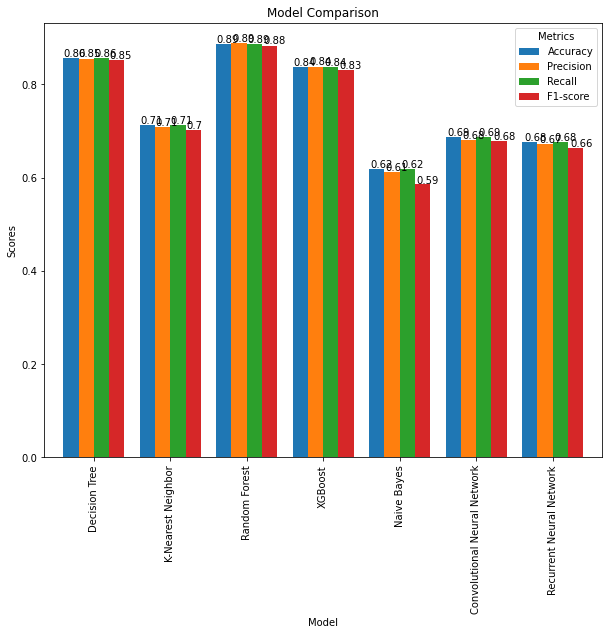

In [54]:
ax = df.plot(kind='bar', x='Model', figsize=(10, 8), width=0.8)

# Đặt tiêu đề cho biểu đồ và trục
ax.set_title('Model Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Scores')

# Hiển thị chú giải
ax.legend(title='Metrics')

# Hiển thị các giá trị trên cột
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

# Hiển thị biểu đồ
plt.show()


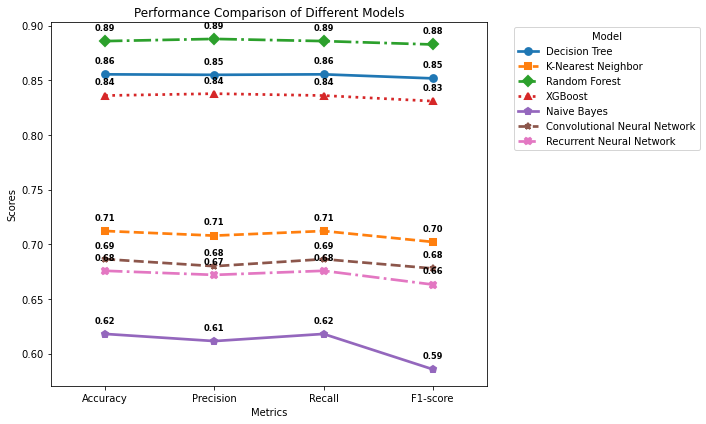

In [79]:
import seaborn as sns

# Tạo biểu đồ điểm
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_long, x='Metric', y='Score', hue='Model', 
              markers=["o", "s", "D", "^", "p", "*", "X"], linestyles=['-', '--', '-.', ':', '-', '--', '-.'])

# Đặt tiêu đề cho biểu đồ và trục
plt.title('Performance Comparison of Different Models')
plt.ylabel('Scores')
plt.xlabel('Metrics')

# Đặt nhãn cho các điểm để dễ dàng đọc
for i in range(len(df_long)):
    plt.text(x=df_long.Metric[i], y=df_long.Score[i]+0.01, s=f"{df_long.Score[i]:.2f}", 
             horizontalalignment='center', size='small', color='black', weight='semibold')

# Hiển thị chú giải
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



### Theo biểu đồ thấy được mô hình RANDOM FOREST có đánh giá hiệu suất tốt nhất

# Chạy thử tập dữ liệu Test

In [63]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [64]:
#loại bỏ tất cả các hàng trong DataFrame test mà có ít nhất một giá trị thiếu
test = test.dropna().copy()

#loại bỏ tất cả các hàng trong DataFrame test mà có ít nhất một giá trị thiếu
test = test.dropna().copy()

#Xóa các cột nằm ngoài phạm vi mô hình
test_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
test = test.drop(test_col , axis=1).copy()
test

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.574949,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.574949,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3,1,605.03,27 Years and 3 Months,No,18.816215,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816215,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3,2_,605.03,27 Years and 6 Months,No,18.816215,!@9#%8,421.44796447960783
...,...,...,...,...,...,...,...,...,...,...,...
49992,29,Architect,20002.88,33,25,3571.7,6 Years and 4 Months,Yes,60.964772,Low_spent_Small_value_payments,314.8151526456419
49993,29,Architect,20002.88,33,25,3571.7,6 Years and 5 Months,Yes,60.964772,Low_spent_Small_value_payments,350.23147346441687
49994,29,_______,20002.88,33,22,3571.7,6 Years and 6 Months,Yes,60.964772,High_spent_Small_value_payments,341.179047488264
49997,25,Mechanic,39628.99,23,5,502.38,32 Years and 0 Months,No,35.104023,Low_spent_Large_value_payments,349.7263321025098


In [65]:
#Loại bỏ giá trị không chính xác
test = test[test['Occupation'].str.contains('_______') == False]
test = test[test['Payment_Behaviour'].str.contains('!@9#%8') == False]

#xử lý dữ liệu và loại bỏ các ký tự không hợp lệ trong các cột
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount']
for i in col_int:
  for c in sym:
    test[i] = test[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    test[i] = test[i].replace(c,'')
test.head()

C:\Users\thaov\AppData\Local\Temp\ipykernel_2032\1717811805.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test[i] = test[i].astype(str).str.replace(c,'')


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.57494921489417,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.57494921489417,High_spent_Medium_value_payments,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816214573128885,Low_spent_Large_value_payments,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18 Years and 6 Months,No,246.9923194537421,Low_spent_Large_value_payments,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17 Years and 11 Months,No,16.415451659824875,High_spent_Medium_value_payments,425.7266258262577


In [66]:
#Chuyển đổi thông tin thành giá trị
test['Credit_History_Age'] = test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
test['Credit_History_Age'] = test['Credit_History_Age'].astype(str).str.replace('Months','')

#Chuyển đổi thông tin thành giá trị theo cấp độ
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
test['Payment_Behaviour'] = test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22.9,No,49.57494921489417,1,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22.10,No,49.57494921489417,5,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27.4,No,18.816214573128885,3,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18.6,No,246.9923194537421,3,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17.11,No,16.415451659824875,5,425.7266258262577


In [67]:
#Chuyển đổi dữ liệu oject thành kiểu dữ liệu float 
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  test[i] = test[i].astype(float)
test.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
dtype: object

In [68]:
# Chuyển đổi dữ liệu mục tiêu thành số
test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].str.replace('NM', '0')
test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].str.replace('Yes', '1')
test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].str.replace('No', '2')
test['Payment_of_Min_Amount'] = test[['Payment_of_Min_Amount']].apply(pd.to_numeric)

test = pd.get_dummies(test, prefix='Occupation', columns=['Occupation'], drop_first=False)
test.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,0,1,0,0
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,0,1,0,0
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,0,1,0
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,0
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,1,0,0,0,0,0,0,0,0,0


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22703 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       22703 non-null  float64
 1   Annual_Income             22703 non-null  float64
 2   Delay_from_due_date       22703 non-null  float64
 3   Num_of_Delayed_Payment    22703 non-null  float64
 4   Outstanding_Debt          22703 non-null  float64
 5   Credit_History_Age        22703 non-null  float64
 6   Payment_of_Min_Amount     22703 non-null  int64  
 7   Total_EMI_per_month       22703 non-null  float64
 8   Payment_Behaviour         22703 non-null  float64
 9   Monthly_Balance           22703 non-null  float64
 10  Occupation_Accountant     22703 non-null  uint8  
 11  Occupation_Architect      22703 non-null  uint8  
 12  Occupation_Developer      22703 non-null  uint8  
 13  Occupation_Doctor         22703 non-null  uint8  
 14  Occupa

In [70]:
test.columns

Index(['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer'],
      dtype='object')

In [71]:
train_data.columns

Index(['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Score'],
      dtype='object')

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81453 entries, 0 to 81452
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       81453 non-null  float64
 1   Annual_Income             81453 non-null  float64
 2   Delay_from_due_date       81453 non-null  float64
 3   Num_of_Delayed_Payment    81453 non-null  float64
 4   Outstanding_Debt          81453 non-null  float64
 5   Credit_History_Age        81453 non-null  float64
 6   Payment_of_Min_Amount     81453 non-null  int64  
 7   Total_EMI_per_month       81453 non-null  float64
 8   Payment_Behaviour         81453 non-null  float64
 9   Monthly_Balance           81453 non-null  float64
 10  Occupation_Accountant     81453 non-null  int64  
 11  Occupation_Architect      81453 non-null  int64  
 12  Occupation_Developer      81453 non-null  int64  
 13  Occupation_Doctor         81453 non-null  int64  
 14  Occupa

In [73]:
Credit_Score = rf.predict(test)

In [74]:
test['Credit_Score'] = Credit_Score

In [75]:
test

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Score
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,1,0,0,2
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,1,0,0,2
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,1,0,2
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,2
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,50.0,37188.10,3.0,12.0,620.64,30.80,2,33013.000000,3.0,257.095501,...,0,0,0,0,0,0,0,0,1,2
49992,29.0,20002.88,33.0,25.0,3571.70,6.40,1,60.964772,1.0,314.815153,...,0,0,0,0,0,0,0,0,0,2
49993,29.0,20002.88,33.0,25.0,3571.70,6.50,1,60.964772,1.0,350.231473,...,0,0,0,0,0,0,0,0,0,2
49997,25.0,39628.99,23.0,5.0,502.38,32.00,2,35.104023,3.0,349.726332,...,0,0,0,1,0,0,0,0,0,2


## Xây dựng ứng dụng

In [76]:
#Lưu mô hình đã huấn luyện để sử dụng cho ứng dụng
import joblib
joblib.dump(rf, "C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/random_forest_model.joblib")

#In ra đường dẫn
print("Model saved to: C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/random_forest_model.joblib")

Model saved to: C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/random_forest_model.joblib


In [86]:
from flask import Flask, request, jsonify
import joblib
# Tạo một Flask app để triển khai mô hình
app = Flask(__name__)

# Load mô hình
model = joblib.load('C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/random_forest_model.joblib')

# Tạo API endpoint
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify(prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\thaov\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
